In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import log_loss

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled.csv',index_col=0)
train_df.head()

,sample_type,age_at_initial_pathologic_diagnosis,percent_lymphocyte_infiltration_TOP,percent_monocyte_infiltration_TOP,percent_neutrophil_infiltration_TOP,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,...,pathologic_stage_Stage IIB,pathologic_stage_Stage IIC,pathologic_stage_Stage III,pathologic_stage_Stage IIIA,pathologic_stage_Stage IIIB,pathologic_stage_Stage IIIC,pathologic_stage_Stage IV,person_neoplasm_cancer_status_WITH TUMOR,radiation_therapy_YES,vital_status_LIVING
MDB-ER-A19T-01,0,51.0,0,0,0,11.22,7.11,0.0,11.28,11.26,...,0,0,0,0,0,0,1,1,1,0
MDB-ER-A196-01,0,64.0,0,0,0,9.17,2.87,0.0,11.76,10.81,...,0,1,0,0,0,0,0,0,0,1
MDB-GN-A26A-06,1,63.0,2,1,0,8.86,4.64,0.0,11.50,10.57,...,0,0,0,1,0,0,0,1,0,0
MDB-D3-A8GI-06,1,68.0,0,0,0,8.35,1.87,0.0,11.38,9.42,...,0,0,0,0,0,0,0,1,0,0
MDB-EE-A2A6-06,1,43.0,35,1,0,9.44,3.19,0.0,11.81,10.50,...,0,0,0,0,0,0,0,0,0,1


In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled.csv',index_col=0)
test_df.head()

,sample_type,age_at_initial_pathologic_diagnosis,percent_lymphocyte_infiltration_TOP,percent_monocyte_infiltration_TOP,percent_neutrophil_infiltration_TOP,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,...,pathologic_stage_Stage IIB,pathologic_stage_Stage IIC,pathologic_stage_Stage III,pathologic_stage_Stage IIIA,pathologic_stage_Stage IIIB,pathologic_stage_Stage IIIC,pathologic_stage_Stage IV,person_neoplasm_cancer_status_WITH TUMOR,radiation_therapy_YES,vital_status_LIVING
MDB-ER-A2NG-06,1,43.0,3,2,0,9.71,1.05,0.0000,11.83,10.02,...,0,0,0,0,0,1,0,1,0,1
MDB-ER-A3ET-06,1,64.0,0,0,0,10.13,2.78,0.0000,11.53,11.08,...,0,0,0,1,0,0,0,1,0,1
MDB-WE-A8ZX-06,1,45.0,0,0,0,8.89,8.04,0.0000,11.00,9.82,...,0,0,0,0,1,0,0,0,1,1
MDB-EB-A6QZ-01,0,76.0,3,0,0,10.24,1.52,0.3677,11.71,10.47,...,0,0,0,0,0,0,0,1,1,0
MDB-EE-A29B-06,1,67.0,2,1,0,9.51,3.26,0.0000,11.98,9.28,...,1,0,0,0,0,0,0,1,0,0


In [4]:
train_target = train_df[['sample_type']]
train_target.astype(float, 64)
train_target.head()

,sample_type
MDB-ER-A19T-01,0
MDB-ER-A196-01,0
MDB-GN-A26A-06,1
MDB-D3-A8GI-06,1
MDB-EE-A2A6-06,1


In [5]:
test_target = test_df[['sample_type']]
test_target.astype(float, 64)
test_target.head()

,sample_type
MDB-ER-A2NG-06,1
MDB-ER-A3ET-06,1
MDB-WE-A8ZX-06,1
MDB-EB-A6QZ-01,0
MDB-EE-A29B-06,1


In [6]:
train_df = train_df.drop(['sample_type'], 1)
test_df = test_df.drop(['sample_type'], 1)

## Classification between Primary Tumor and Metastatic (without PCA)

### Logistic Regression

In [7]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_feature_lr = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr.best_score_)
print(grid_search_feature_lr.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:   18.1s finished


Best parameter (CV score=0.941):
{'logistic__C': 0.1, 'logistic__penalty': 'l1'}


LogisticRegression accuracy: 0.906


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

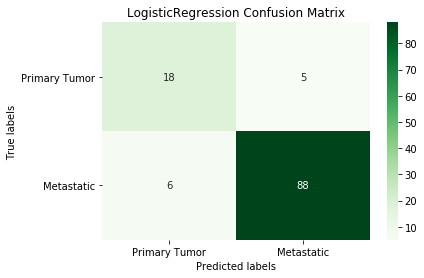

In [8]:
lr_model = grid_search_feature_lr.best_estimator_

lr_pred = grid_search_feature_lr.predict(test_df)

print('LogisticRegression accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

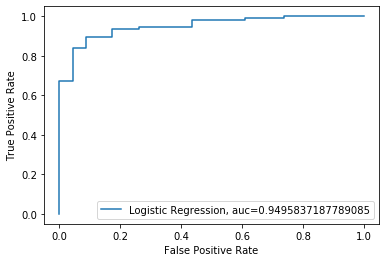

In [9]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [10]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  lr_pred_proba)
print(log_loss_score)

0.25973083521069534


### Support Vector Machines

In [11]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm.best_score_)
print(grid_search_feature_svm.best_params_)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   35.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done 576 out of 576 | elapsed: 11.1min finished


Best parameter (CV score=0.927):
{'SVM__C': 10, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 1e-05, 'SVM__kernel': 'rbf'}


Support Vector Machines accuracy: 0.872


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

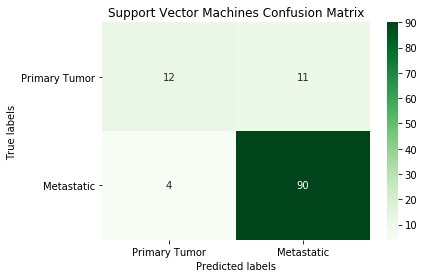

In [12]:
svm_model = grid_search_feature_svm.best_estimator_

svm_pred = grid_search_feature_svm.predict(test_df)

print('Support Vector Machines accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

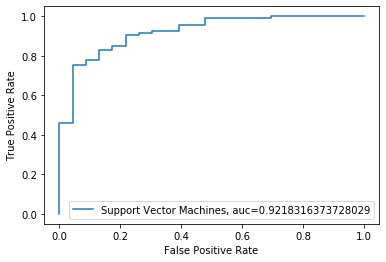

In [13]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [14]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  svm_pred_proba)
print(log_loss_score)

0.2660863599122766


### Random Forest 

In [15]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf.best_score_)
print(grid_search_feature_rf.best_params_)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 15.0min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed: 27.6min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 44.6min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed: 58.2min finished


Best parameter (CV score=0.916):
{'rf__bootstrap': True, 'rf__max_features': 0.65, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 30}


Random Forest accuracy: 0.838


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

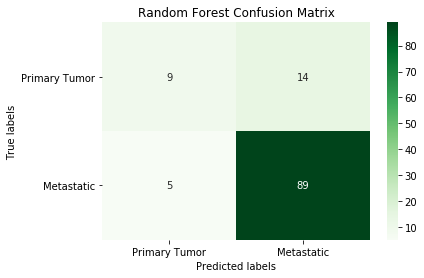

In [16]:
rf_model = grid_search_feature_rf.best_estimator_

rf_pred = grid_search_feature_rf.predict(test_df)

print('Random Forest accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

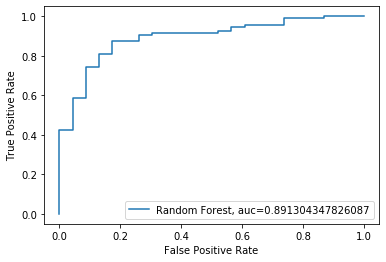

In [17]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [18]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  rf_pred_proba)
print(log_loss_score)

0.32703796348928216


## Classification between Primary Tumor and Metastatic (with PCA)

### Using Logistic Regression

In [19]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_lr_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_lr_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_lr_pca.best_score_)
print(grid_search_lr_pca.best_params_)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   25.5s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  1.6min finished


Best parameter (CV score=0.927):
{'logistic__C': 100, 'logistic__penalty': 'l1', 'pca__n_components': 0.9}


In [20]:
grid_search_lr_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, svd_solver='full')),
                ('logistic',
                 LogisticRegression(C=100, max_iter=10000, penalty='l1',
                                    solver='liblinear', tol=0.001))])

LogisticRegression accuracy: 0.889


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

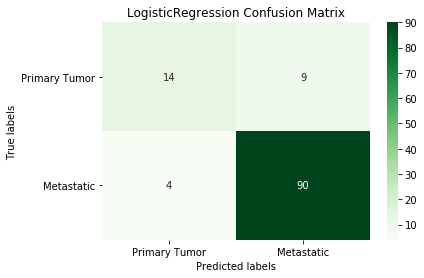

In [21]:
lr_model_pca = grid_search_lr_pca.best_estimator_

lr_pred = grid_search_lr_pca.predict(test_df)

print('LogisticRegression accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

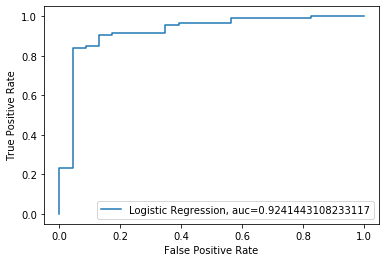

In [22]:
lr_model = grid_search_lr_pca.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [23]:
lr_model = grid_search_lr_pca.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  lr_pred_proba)
print(log_loss_score)

0.47659500495814744


### Using Support Vector Machines

In [24]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),    
  ('SVM', SVC(probability=True))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10], 
    "SVM__kernel": ["linear","poly","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_svm_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_svm_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_svm_pca.best_score_)
print(grid_search_svm_pca.best_params_)

Fitting 2 folds for each of 1080 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   23.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 14.5min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 19.4min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 25.5min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed: 26.9min finished


Best parameter (CV score=0.912):
{'SVM__C': 10, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 0.0001, 'SVM__kernel': 'rbf', 'pca__n_components': 0.9}


In [25]:
grid_search_svm_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, svd_solver='full')),
                ('SVM',
                 SVC(C=10, decision_function_shape='ovo', gamma=0.0001,
                     probability=True))])

Support Vector Machines accuracy: 0.863


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

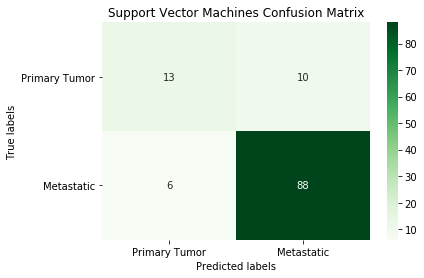

In [26]:
svm_model = grid_search_svm_pca.best_estimator_

svm_pred = grid_search_svm_pca.predict(test_df)

print('Support Vector Machines accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

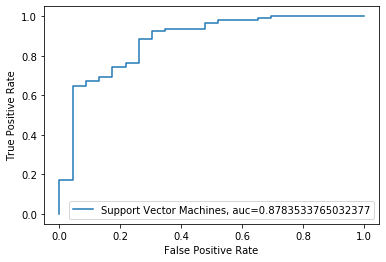

In [27]:
svm_model = grid_search_svm_pca.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [30]:
svm_model = grid_search_svm_pca.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  svm_pred_proba)
print(log_loss_score)

0.40389510901814785


### Using Random Forest

In [31]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),    
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_rf_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_rf_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_rf_pca.best_score_)
print(grid_search_rf_pca.best_params_)

Fitting 2 folds for each of 2500 candidates, totalling 5000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   40.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed: 11.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 17.9min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 26.5min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 36.8min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 48.5min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 62.2min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 77.3min
[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed: 85.8min
[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed: 95.9min
[Parallel(n_jobs=4)]: Done 5000 out of 5000 | elapsed: 100.8min finished


Best parameter (CV score=0.853):
{'pca__n_components': 0.6, 'rf__bootstrap': True, 'rf__max_features': 0.8, 'rf__min_samples_leaf': 12, 'rf__min_samples_split': 2, 'rf__n_estimators': 60}


In [32]:
grid_search_rf_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.6, svd_solver='full')),
                ('rf',
                 RandomForestClassifier(max_features=0.8, min_samples_leaf=12,
                                        n_estimators=60, random_state=1))])

Random Forest accuracy: 0.829


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

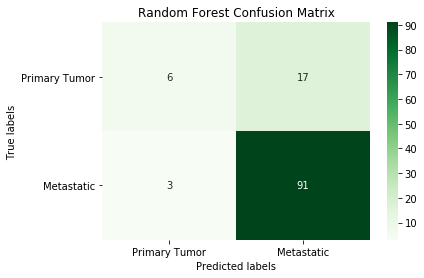

In [33]:
rf_model = grid_search_rf_pca.best_estimator_

rf_pred = grid_search_rf_pca.predict(test_df)

print('Random Forest accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

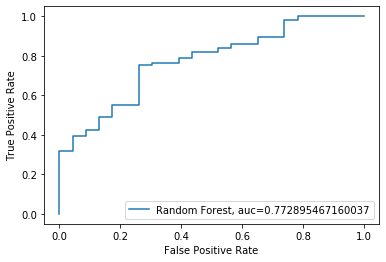

In [34]:
rf_model = grid_search_rf_pca.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [35]:
rf_model = grid_search_rf_pca.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  rf_pred_proba)
print(log_loss_score)

0.4393469168841925


### Weights

In [36]:
lr_model = grid_search_feature_lr.best_estimator_
lr_weights_df = pd.DataFrame(lr_model[1].coef_[0])
lr_weights_df.index = train_df.columns
lr_weights_df.columns = ["weights"]
lr_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
lr_weights_df.head(20)

,weights
C7,0.532291
FILIP1,0.207911
NFATC3,0.154544
MECOM,0.104941
FLT1,0.030071
INHBB,0.020548
MGC23284,0.014820
ACER2,0.003113
CLIC5,0.000073
GPR173,0.000000


In [37]:
svm_model = grid_search_feature_svm.best_estimator_
importances = np.dot(svm_model[1].support_,svm_model[1].support_vectors_)
svm_weights_df = pd.DataFrame(importances)
svm_weights_df.index = train_df.columns
svm_weights_df.columns = ["weights"]
svm_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
svm_weights_df.head(10)

,weights
SLC26A6,8103.326978
TRMU,7732.442254
LOC440957,7693.846730
LOC729991,7582.300669
TMEM115,7491.519153
ZMYND19,7323.814052
AGPAT2,7222.234083
PPFIA3,7212.340776
MMP17,7164.239397
DGCR6,7124.385990


In [38]:
rf_model = grid_search_feature_rf.best_estimator_
rf_weights_df = pd.DataFrame(rf_model[1].feature_importances_)
rf_weights_df.index = train_df.columns
rf_weights_df.columns = ["weights"]
rf_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
rf_weights_df.head(10)

,weights
KRT17,0.257244
S100A7,0.118814
C7,0.098416
KRT6B,0.092514
KRT14,0.046584
MECOM,0.020924
KRT75,0.019791
KLK5,0.018963
CNGB1,0.018780
pathologic_stage_Stage IIC,0.014850


In [39]:
weights = lr_weights_df.merge(svm_weights_df,left_index=True, right_index=True)
weights = weights.merge(rf_weights_df,left_index=True, right_index=True)
weights.columns = ["Logistic Regression", "Support Vector Machines","Random Forest"]
weights.head(20)

,Logistic Regression,Support Vector Machines,Random Forest
C7,0.532291,-5713.329457,0.098416
FILIP1,0.207911,-5763.709079,0.001264
NFATC3,0.154544,-7610.096821,0.010255
MECOM,0.104941,-3127.734990,0.020924
FLT1,0.030071,-3056.864950,0.000000
INHBB,0.020548,-18.115722,0.000000
MGC23284,0.014820,3017.464351,0.000000
ACER2,0.003113,-3419.152150,0.000000
CLIC5,0.000073,-6441.242217,0.004864
GPR173,0.000000,1006.909041,0.000000


In [40]:
weights.to_csv('../data/Melanoma_ALL_classifier_[WITHOUT PCA]_weights_all_data.csv')